<b><font size="4">Pyber Ride Sharing Company</font></b>

<b>Conclusions we can draw from this analysis:</b>

1. Ride costs are generally much higher in suburban cities than in urban cities, most likely due fewer drivers in the area, driving up the cost. 
2. Urban cities have a very high percentage of drivers, creating more competition and possibly driving the ride fares down.
2. Increasing the number of drivers in urban cities can continue to feed into the high demand, and drive even more revenue for Pyber. Even though fares are lower as compared to urban and suburban rides, 68.4% of total rides are currently in urban cities, which is the majority of the revenue for Pyber.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [2]:
# Group by city name
city_group = combined_data_df.groupby("city")

# Variable to hold avg fare by city
avg_fare = city_group["fare"].mean()
# avg_fare

# Variable to hold number of rides by city
num_rides = city_group["ride_id"].count()

# Number of drivers
num_drivers = city_group["driver_count"].mean()

# Data by city type
city_type = city_data_df.set_index("city")["type"]

# Put the above data into a df
city_data = pd.DataFrame({"Number of Rides": num_rides,
                         "Average Fare": avg_fare,
                         "Number of Drivers": num_drivers,
                         "Type of City": city_type
                         })

city_data.sort_values("Number of Drivers", ascending=False)
city_data.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


In [3]:
# Separated dfs for city types
rural = city_data[city_data["Type of City"] == "Rural"]
suburban = city_data[city_data["Type of City"] == "Suburban"]
urban = city_data[city_data["Type of City"] == "Urban"]

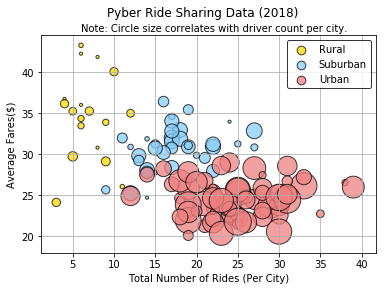

In [18]:
# Scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = "gold", edgecolor = 'black', label = 'Rural', alpha = .75)

plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = "lightskyblue", edgecolor = 'black', label = 'Suburban', alpha = .75)

plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = "lightcoral", edgecolor = 'black', label = 'Urban', alpha = .75)

# Title and labels
plt.suptitle("Pyber Ride Sharing Data (2018)")
plt.ylabel("Average Fares($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.text(6,45, 'Note: Circle size correlates with driver count per city.')

# Create legend
# plt.legend(handles=[rural, suburban, urban], loc="best")
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Format plot and save fig
plt.grid()
plt.savefig('Images/Pyber_Scatterplot.png')
plt.show()

## Total Fares by City Type

In [19]:
# Set labels, sizes, colors, and explode the pie graph
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]

In [20]:
# Total fares
fare_percent = combined_data_df.groupby(['type']).sum()['fare']/combined_data_df['fare'].sum()*100
fare_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

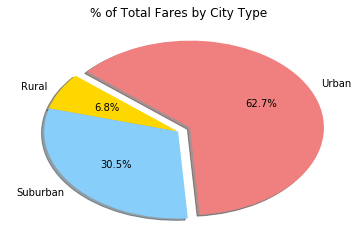

In [21]:
# Plot graph
plt.pie(fare_percent, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.savefig('Images/Pyber_Fares_by_City.png')
plt.show()

## Total Rides by City Type

In [22]:
# Show df
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [16]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [23]:
# Groupby function
ride_percent = combined_data_df.groupby(['type']).count()['ride_id']/combined_data_df['ride_id'].count()*100
ride_percent

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

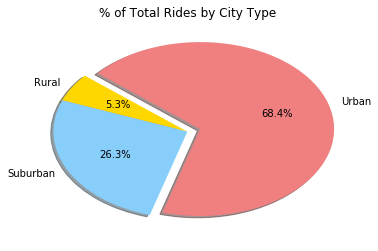

In [24]:
# Show Figure
plt.pie(ride_percent, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.savefig('Images/Pyber_Rides_by_City.png')
plt.show()

## Total Drivers by City Type

In [25]:
# Calculate Driver Percents
driver_percent = city_data_df.groupby(['type']).sum()['driver_count']/city_data_df['driver_count'].sum()*100
driver_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

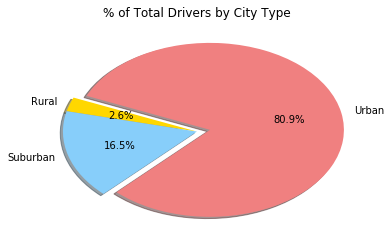

In [34]:
# Show Figure
plt.pie(driver_percent, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=157)

plt.title("% of Total Drivers by City Type")
plt.savefig('Images/Pyber_Drivers_by_City.png')
plt.show()